In [1]:
%pylab inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from scipy.stats import rankdata
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_score_map(weight_file, position_file):
    score_map = {}
    with open(weight_file) as f, open(position_file) as f_pos:
        while True:
            weight_info = f.readline().strip()
            position_info = f_pos.readline().strip()

            if (weight_info != "") and (position_info != ""):
                chromID, motif_start, motif_end, seq_start, seq_end, strand = position_info.split(",")
                seq_start, seq_end = int(seq_start), int(seq_end)
                weights_raw = [abs(float(wt)) for wt in weight_info.split(";")]
                weights_sum = sum(weights_raw)
                weights = [w/weights_sum for w in weights_raw]
                weight_ranks = rankdata(weights, method="max")
                for idx in range(1000):
                    if (chromID, seq_start+idx) not in score_map:
                        score_map[(chromID, seq_start+idx)] = [0, 0]
                        
                    if strand == "+":
                        if abs(weights[idx]) > abs(score_map[(chromID, seq_start+idx)][0]):
                            score_map[(chromID, seq_start+idx)] = [weights[idx], weight_ranks[idx]]
                    elif strand == "-":
                        if abs(weights[999-idx]) > abs(score_map[(chromID, seq_start+idx)][0]):
                            score_map[(chromID, seq_start+idx)] = [weights[999-idx], weight_ranks[999-idx]]
                    else:
                        exit("wrong strand symbol: %s" %(strand))
            elif (weight_info == "") and (position_info == ""):
                break
            else:
                exit("Files do not match:\n%s\n%s" %(weight_file, position_file))
    return score_map

TF_name = "PU1" # choose one from LHX2  NeuN  Olig2  PU1
position_file = "/storage/pandaman/project/Alzheimers_ResNet/storage/experiments/seqs_one_hot_extended_sliding/%s/visualization/auxiliary_info.txt" %(TF_name)
weight_file = "/storage/pandaman/project/Alzheimers_ResNet/storage/experiments/results_extended_coordconv_sliding/%s/annations_abs/scores.txt" %(TF_name)
score_map = read_score_map(weight_file, position_file)

In [3]:
score_list = []
chromID, start, end = ("chr2", 127885699, 127886699)
for pos in range(start, end):
    score, rank = score_map[(chromID, pos)]
    score_list.append(score)
score_list = score_list[250:-250]
len(score_list)

500

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


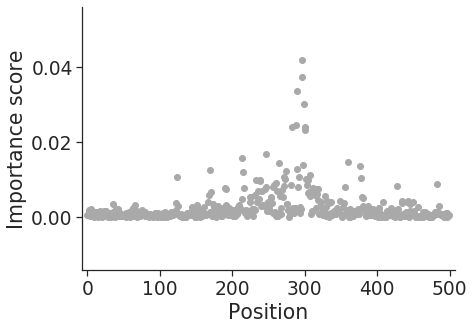

In [4]:
sns.set(style='white', font_scale=1.7)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.scatter([idx for idx in range(len(score_list))], score_list, color="darkgrey")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("Position", fontname="Arial")
ax.set_ylabel("Importance score", fontname="Arial")
ax.set_xlim(-7,len(score_list)+7)
# plt.vlines(426,0,0.03)
plt.tight_layout()
plt.show()